![docs/images/banner-small.png](docs/images/banner-small.png)

In [1]:
!pip install invertedai_drive
%matplotlib widget
from invertedai_drive import drive
import numpy as np
import cv2
from IPython.display import clear_output
clear_output()

In [ ]:
# Colab Compatible Custom Widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
class colab_render(widgets.HBox):
    def __init__(self):
        super().__init__()
        output = widgets.Output()
        self.buffer = [np.zeros([128, 128, 3], dtype=np.uint8)]

        with output:
            self.fig, self.ax = plt.subplots(constrained_layout=True, figsize=(5, 5))
        self.im = self.ax.imshow(self.buffer[0])
        self.ax.set_axis_off()

        self.fig.canvas.toolbar_position = "bottom"

        self.max = 0
        # define widgets
        self.play = widgets.Play(
            value=0,
            min=0,
            max=self.max,
            step=1,
            description="Press play",
            disabled=False,
        )
        self.int_slider = widgets.IntSlider(
            value=0, min=0, max=self.max, step=1, description="Frame"
        )

        controls = widgets.HBox(
            [
                self.play,
                self.int_slider,
            ]
        )
        controls.layout = self._make_box_layout()
        widgets.jslink((self.play, "value"), (self.int_slider, "value"))
        output.layout = self._make_box_layout()

        self.int_slider.observe(self.update, "value")
        self.children = [controls, output]

    def update(self, change):
        self.im.set_data(self.buffer[self.int_slider.value])
        self.fig.canvas.draw()

    def add_frame(self, frame):
        self.buffer.append(frame)
        self.int_slider.max += 1
        self.play.max += 1
        self.int_slider.value = self.int_slider.max
        self.play.value = self.play.max

    def _make_box_layout():
        return widgets.Layout(
            border="solid 1px black",
            margin="0px 10px 10px 0px",
            padding="5px 5px 5px 5px",
        )


jupyter_render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

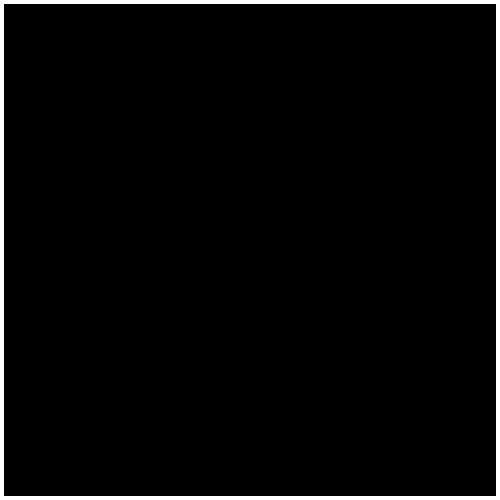

In [5]:
config = drive.config(
    api_key="",
    location="",
    agent_count=10,
    batch_size=1,
    obs_length=1,
    step_times=1,
    min_speed=10,
    max_speed=20,
)
simulation_lenght = 50
renderer = colab_render()
display(renderer)

In [6]:
response = drive.initialize(config)
agent_attributes = response["attributes"]
frames = []
for t in range(simulation_lenght):
    response = drive.run(
        config=config,
        location=config.location,
        agent_attributes=agent_attributes,
        states=response["states"],
        recurrent_states=response["recurrent_states"],
        return_birdviews=True,
    )
    birdview = cv2.imdecode(np.array(response["bird_view"], dtype=np.uint8), cv2.IMREAD_COLOR)
    renderer.add_frame(birdview)